# Unraveling MBTI Types from Online Posts


## Data Preprocessing

In [2]:
#pip install pandas nltk

In [3]:
#pip install scikit-learn

In [5]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('stopwords')

In [6]:
# df = pd.read_csv('mbti.csv')
# df.shape

Now that we have imported the dataset, the first step is to clean data which includes the following steps:
1. Removing the URLs in the posts, as they are not a relevant feature for our classification task
2. Removing special characters and numbers for further processing
3. Removing stop words (a set of commonly used words in the English language such as 'a', 'the', 'and', etc which give us little information in our context)
4. Converting the words to lowercase letters, since the semantic meaning of a word such as MoVInG and moving is the same.
5. **Lemmatization**: Reducing the words to their basic form, helps reduce the complexity of textual data while retaining the semantic meaning of words. For example all the words 'running', 'runs', 'ran' get lemmatized to the simple word 'run'.

In [7]:
# def clean_posts(post):
#     # Remove URLs
#     post = re.sub(r'http\S+', '', post)
#     # Remove special characters and numbers
#     post = re.sub(r'[^A-Za-z\s]', '', post)
#     # Tokenize
#     tokens = word_tokenize(post)
#     # Initialize Lemmatizer
#     lemmatizer = WordNetLemmatizer()
#     # Lemmatize tokens
#     lemmatized_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stopwords.words('english')]
#     # Rejoin lemmatized tokens into a single string
#     clean_post = ' '.join(lemmatized_tokens)
#     return clean_post

The next step is to apply the cleaning methods described above, to our dataset. Given that we have 8000 datapoints, this is a time-consuming process. Thus, we save it locally and use that one in the future instead of cleaning the data everytime we want to apply a model.

In [8]:
#df = df.head(500)
#df['cleaned_posts'] = df['posts'].apply(lambda x: '|||'.join([clean_posts(post) for post in x.split('|||')]))

In [9]:
#df.to_csv('cleaned_dataset.csv', index=False)

In [10]:
import pandas as pd

df = pd.read_csv('cleaned_dataset.csv')


Here is an example to illustrate the data-cleaning process:

By considering the last post, we can see that the post we can see that

*Move to the Denver area and start a new life for myself.*

is converted to

*move denver area start new life*

The stop words 'to', 'the', 'and', 'a', 'for', 'myself' are removed. Every word is in lowercase letters.

In [11]:
df.iloc[0]['posts']

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [12]:
df.iloc[0]['cleaned_posts']

'||||||enfp intj moment sportscenter top ten play prank|||lifechanging experience life|||repeat today|||may perc experience immerse|||last thing infj friend posted facebook committing suicide next day rest peace|||hello enfj sorry hear distress natural relationship perfection time every moment existence try figure hard time time growth||||||welcome stuff|||game set match|||prozac wellbrutin least thirty minute moving leg dont mean moving sitting desk chair weed moderation maybe try edible healthier alternative|||basically come three item youve determined type whichever type want would likely use given type cognitive function whatnot left|||thing moderation sims indeed video game good one note good one somewhat subjective completely promoting death given sim|||dear enfp favorite video game growing current favorite video game cool||||||appears late sad|||there someone everyone|||wait thought confidence good thing|||cherish time solitude bc revel within inner world whereas time id workin 

In [13]:
df

,type,posts,cleaned_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,||||||enfp intj moment sportscenter top ten pl...
1,ENTP,'I'm finding the lack of me in these posts ver...,im finding lack post alarming|||sex boring pos...
2,INTP,'Good one _____ https://www.youtube.com/wat...,good one|||course say know thats blessing curs...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",dear intp enjoyed conversation day esoteric ga...
4,ENTJ,'You're fired.|||That's another silly misconce...,youre fired|||thats another silly misconceptio...
...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,|||ixfp always think cat fi doms reason|||espe...
8671,ENFP,'So...if this thread already exists someplace ...,soif thread already exists someplace else heck...
8672,INTP,'So many questions when i do these things. I ...,many question thing would take purple pill pic...
8673,INFP,'I am very conflicted right now when it comes ...,conflicted right come wanting child honestly m...


In [14]:
pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 2.7 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [15]:
from imblearn.over_sampling import SMOTE
from collections import Counter


X = df['cleaned_posts']
y = df['type']

In [16]:
print("Original dataset distribution:")
print(Counter(y))

Original dataset distribution:
Counter({'INFP': 1832, 'INFJ': 1470, 'INTP': 1304, 'INTJ': 1091, 'ENTP': 685, 'ENFP': 675, 'ISTP': 337, 'ISFP': 271, 'ENTJ': 231, 'ISTJ': 205, 'ENFJ': 190, 'ISFJ': 166, 'ESTP': 89, 'ESFP': 48, 'ESFJ': 42, 'ESTJ': 39})


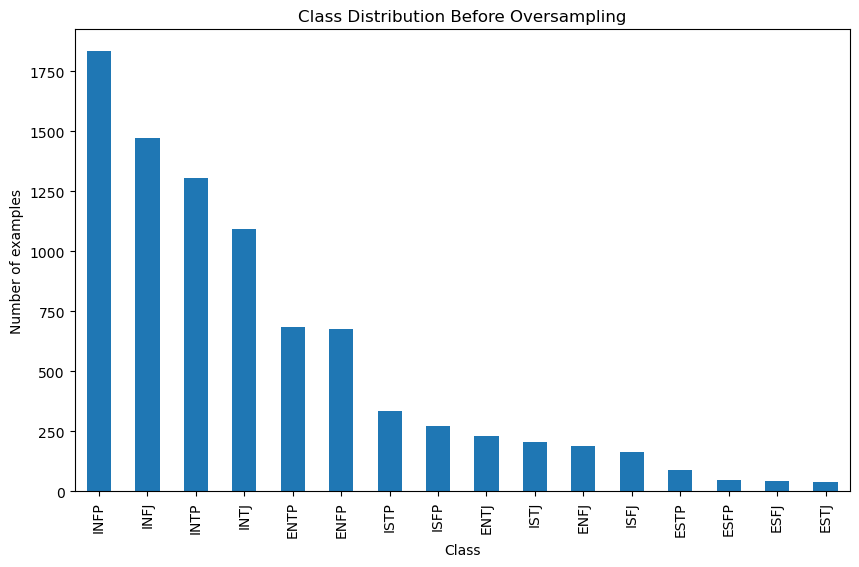

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

y.value_counts().plot(kind='bar')
plt.title('Class Distribution Before Oversampling')
plt.xlabel('Class')
plt.ylabel('Number of examples')
plt.show()


In [17]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
# import LabelEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np

from sklearn.metrics import accuracy_score
from keras.layers import Dense, Activation, Dropout



2024-02-12 21:35:32.210748: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
#Parameters:
MAX_SEQUENCE_LENGTH = 800 # Max number of words in each complaint.
EMBEDDING_DIM = 200 # Dimension of the word embedding vectors (50, 100, 200, 300) #Each token is represented as a vector in this space, and the size of the vector is the embedding size
num_classes = 16
VOCAB_SIZE = 36973 # The maximum number of words to be used    ----- len(word_index)+1


RNNS using LSTM

create text encoder

In [19]:
tokenizer = tf.keras.preprocessing.text.Tokenizer() # Setup tokenizer
tokenizer.fit_on_texts(df['cleaned_posts']) # Fit tokenizer on our text data
tokenizer.word_index # Get our learned vocabulary
word_index = tokenizer.word_index # Get our learned vocabulary
word_index
len(word_index)
VOCAB_SIZE = len(word_index)+1


In [20]:
X = tokenizer.texts_to_sequences(df['cleaned_posts']) # Convert text to sequence USING tokenizer created above
#print('text to sequence tooks like' , X[0])
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen= MAX_SEQUENCE_LENGTH) # Pad the sequence to the same length to make it uniform
#print('text sequence to sequence pad looks like' ,X[0])

y = df['type']  # One hot encode the target variable

In [21]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X,y)


Class distribution after resampling: Counter({'INFJ': 1832, 'ENTP': 1832, 'INTP': 1832, 'INTJ': 1832, 'ENTJ': 1832, 'ENFJ': 1832, 'INFP': 1832, 'ENFP': 1832, 'ISFP': 1832, 'ISTP': 1832, 'ISFJ': 1832, 'ISTJ': 1832, 'ESTP': 1832, 'ESFP': 1832, 'ESTJ': 1832, 'ESFJ': 1832})


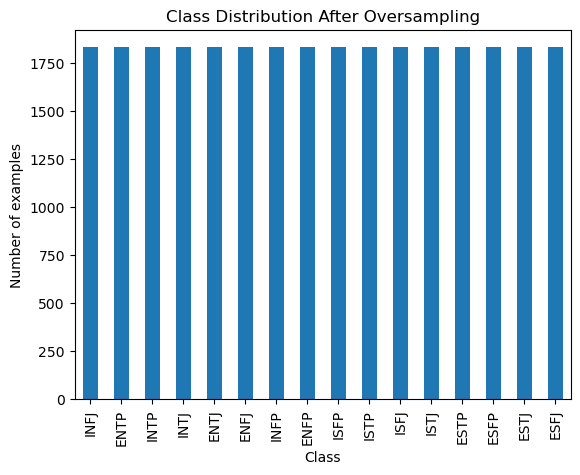

In [24]:
# Display the class distribution after resampling
print("Class distribution after resampling:", Counter(y_res))
pd.Series(y_res).value_counts().plot(kind='bar')
plt.title('Class Distribution After Oversampling')
plt.xlabel('Class')
plt.ylabel('Number of examples')
plt.show()

In [25]:
y_res_one_hot = pd.get_dummies(y_res)

### Model

Recurrent Neural Network(RNN) is a type of Neural Network where the output from the previous step is fed as input to the current step. This is a short-term memory to process Sequential data

Advantages :
- RNN has a memory that captures what has been calculated so far.
- RNNs are ideal for text and speech data analysis.

Disadvantages:
- RNN suffers from exploding and vanishing gradient, which makes the RNN model learn slower by propagating a lesser amount of error backward.
- This works well for short sentences, when we deal with a long article, there will be a long term dependency problem

Long Short Term Memory network usually just called “LSTM” — is a special kind of RNN. It is capable of learning long-term dependencies. LLSTM is explicitly designed to avoid the long-term dependency problem.

How do LSTM solve this problem? Thanks to their architecture!


LSTM has chains of repeating the LSTM block. It is called LSTM cell. Each LSTM cells have four neural network layers interacting within: Cell State, Forget Gate, Input Gate, Output Gate
Each LSTM cell receives an input from an Input sequence, previous cell state and output from previous LSTM cell.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res_one_hot, test_size=0.2, random_state=1234)

model = Sequential() # Call Sequential to initialize a network
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=X.shape[1])) # Add an embedding layer which represents each unique token as a vector
model.add(SpatialDropout1D(0.3)) # Dropout layer to avoid overfitting
model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3)) # Recurrent layer
model.add(Dense(EMBEDDING_DIM, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(EMBEDDING_DIM, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(num_classes, activation='softmax')) # Output layer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Compile the network

epochs = 50 # Number of passes through entire dataset
batch_size =  64 # Number of samples processed before the model is updated

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2,
                    callbacks=[
                        EarlyStopping(monitor='val_loss',
                                      patience=5,
                                      min_delta=1e-8)]) # Train the model

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_int = np.argmax(y_test.values, axis=1) # Convert one hot encoded y_test back to categorical
accuracy = accuracy_score(y_test_int, y_pred)
print("Accuracy:", accuracy)
#Simpler : Embeddging LSTM output
#Baseline model: simple model (NLP, naive bayes), kaggle or other submissions.

Epoch 1/50
294/294 [==============================] - 1284s 4s/step - loss: 2.7743 - accuracy: 0.0621 - val_loss: 2.7725 - val_accuracy: 0.0670
Epoch 2/50
294/294 [==============================] - 1099s 4s/step - loss: 2.7711 - accuracy: 0.0694 - val_loss: 2.7578 - val_accuracy: 0.0776
Epoch 3/50
294/294 [==============================] - 812s 3s/step - loss: 2.7156 - accuracy: 0.0940 - val_loss: 2.6132 - val_accuracy: 0.1175
Epoch 4/50
294/294 [==============================] - 1148s 4s/step - loss: 2.6566 - accuracy: 0.1071 - val_loss: 2.7754 - val_accuracy: 0.0616
Epoch 5/50
294/294 [==============================] - 961s 3s/step - loss: 2.7756 - accuracy: 0.0632 - val_loss: 2.7735 - val_accuracy: 0.0620
Epoch 6/50
294/294 [==============================] - 3538s 12s/step - loss: 2.7729 - accuracy: 0.0630 - val_loss: 2.7734 - val_accuracy: 0.0565
Epoch 7/50
294/294 [==============================] - 9013s 31s/step - loss: 2.7729 - accuracy: 0.0628 - val_loss: 2.7734 - val_accuracy:

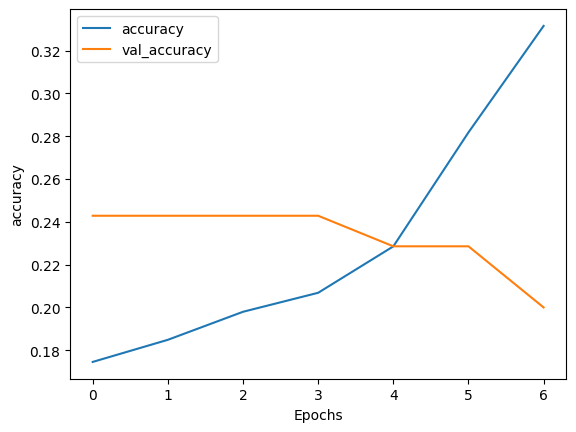

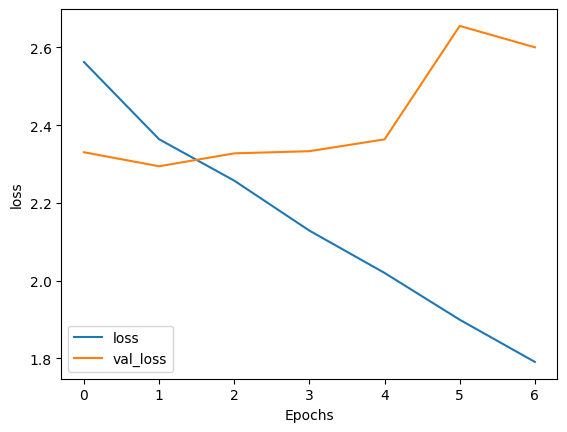

In [ ]:
from matplotlib import pyplot as plt
def graph_plots(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

graph_plots(history, "accuracy")
graph_plots(history, "loss")

#val_loss represents the model's error (or loss) on the validation set.
#Val_accuracy measures the proportion of the validation set that is correctly classified by the model

# another parameters


In [ ]:

#Parameters:
MAX_SEQUENCE_LENGTH = 120 # Max number of words in each complaint.
EMBEDDING_DIM = 60 # Dimension of the word embedding vectors (50, 100, 200, 300) #Each token is represented as a vector in this space, and the size of the vector is the embedding size
num_classes = 16
VOCAB_SIZE = len(word_index) +1 # The maximum number of words to be used    ----- len(word_index)+1

#word to vec again :
X = tokenizer.texts_to_sequences(df['cleaned_posts']) # Convert text to sequence USING tokenizer created above
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen= MAX_SEQUENCE_LENGTH) # Pad the sequence to the same length to make it uniform
y = df['type']
y_one_hot = pd.get_dummies(y)   # One hot encode the target variable

#splitting dat a
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=1234)

#Model 2:
model = Sequential() # Call Sequential to initialize a network
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM,
                    input_length=X_train.shape[1],
                    mask_zero =True ,
                    trainable = True)) # Add an embedding layer which represents each unique token as a vector
model.add(LSTM(EMBEDDING_DIM,
               dropout=0.5,
               recurrent_dropout=0.5,
               activation = "sigmoid",
               kernel_initializer = "zeros")) # Recurrent layer
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='sigmoid')) # Output layer
optimizer = Adam(learning_rate = 0.01)
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']) # Compile the network

epochs = 30 # Number of passes through entire dataset
batch_size =  128 # Number of samples processed before the model is updated

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2, #0.05 , 0.2
                    callbacks=[
                        EarlyStopping(monitor='val_loss',
                                      patience=3,
                                      min_delta=1e-5)]) # Train the model

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_test_int = np.argmax(y_test.values, axis=1) # Convert one hot encoded y_test back to categorical
accuracy = accuracy_score(y_test_int, y_pred)
print("Accuracy:", accuracy)

Epoch 1/30
44/44 [==============================] - 29s 532ms/step - loss: 2.3819 - accuracy: 0.1895 - val_loss: 2.2432 - val_accuracy: 0.2298
Epoch 2/30
44/44 [==============================] - 24s 528ms/step - loss: 2.2491 - accuracy: 0.2541 - val_loss: 2.2875 - val_accuracy: 0.2104
Epoch 3/30
44/44 [==============================] - 22s 488ms/step - loss: 1.9266 - accuracy: 0.3982 - val_loss: 2.5113 - val_accuracy: 0.1866
Epoch 4/30
55/55 [==============================] - 2s 31ms/step
Accuracy: 0.15273775216138327


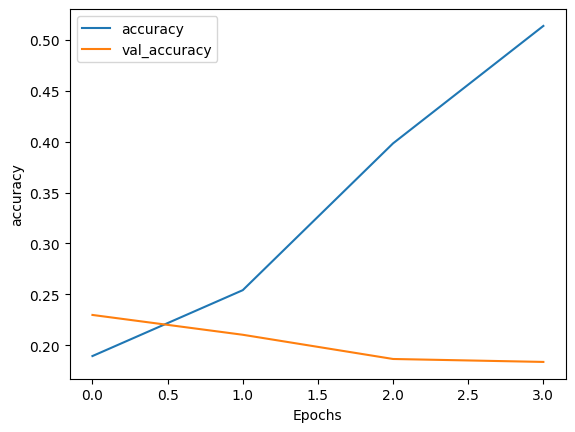

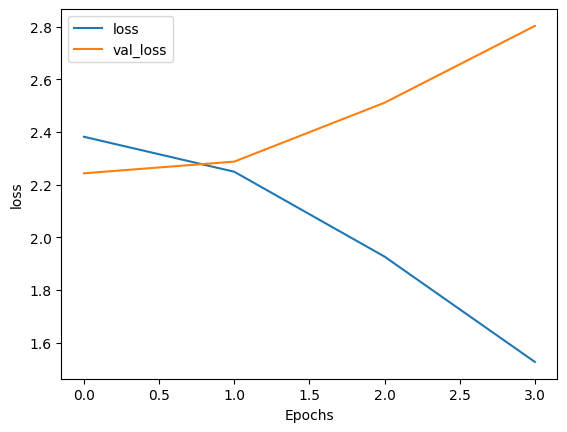

In [ ]:
 def graph_plots(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

graph_plots(history, "accuracy")
graph_plots(history, "loss")

## Adding Cross validation kfold


In [ ]:
from sklearn.model_selection import KFold

MAX_SEQUENCE_LENGTH = 800
EMBEDDING_DIM = 100
num_classes = 16
VOCAB_SIZE = len(word_index) + 1
epochs = 30
batch_size = 128
#word to vec again :
X = tokenizer.texts_to_sequences(df['cleaned_posts']) # Convert text to sequence USING tokenizer created above
X = tf.keras.preprocessing.sequence.pad_sequences(X, maxlen= MAX_SEQUENCE_LENGTH) # Pad the sequence to the same length to make it uniform
y = df['type']
y_one_hot = pd.get_dummies(y)   # One hot encode the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=1234)

# K-Fold Cross-validation
n_splits = 5  # For example, 5-fold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=1234)

accuracy_scores = []

fold_var = 1

for train_index, val_index in kf.split(X_train):
    print(train_index)
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_test[train_index], y_test[val_index]

    model = Sequential() # Call Sequential to initialize a network
    model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM,
                        input_length=X_train.shape[1],
                        mask_zero =True ,
                        trainable = True)) # Add an embedding layer which represents each unique token as a vector
    model.add(LSTM(EMBEDDING_DIM,
                  dropout=0.5,
                  recurrent_dropout=0.5,
                  activation = "sigmoid",
                  kernel_initializer = "zeros")) # Recurrent layer
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='sigmoid')) # Output layer
    optimizer = Adam(learning_rate = 0.01)
    model.compile(
        loss='categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']) # Compile the network

    history = model.fit(X_train_fold, y_train_fold,
                        epochs=epochs, batch_size=batch_size,
                        validation_data=(X_val_fold, y_val_fold),
                        callbacks=[
                            EarlyStopping(monitor='val_loss', patience=5, min_delta=1e-8)])

    # Evaluate the model on the validation set
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f"Score for fold {fold_var}: {model.metrics_names[1]} of {scores[1]*100}%")
    accuracy_scores.append(scores[1] * 100)

    fold_var += 1

print(f"K-Fold Validation Accuracy: {np.mean(accuracy_scores)}% (+/- {np.std(accuracy_scores)})")


[   0    1    2 ... 6936 6937 6938]


KeyError: "None of [Int64Index([   0,    1,    2,    3,    4,    7,    8,    9,   10,   11,\n            ...\n            6926, 6927, 6929, 6930, 6931, 6934, 6935, 6936, 6937, 6938],\n           dtype='int64', length=5552)] are in the [columns]"


# what if I don't one_hot encode my labels and do a multiclass classification with each class represented as an integer

In [ ]:
label_tokenizer = tf.keras.preprocessing.text.Tokenizer()
label_tokenizer.fit_on_texts(list(y))
label_seq = np.array(label_tokenizer.texts_to_sequences(y))
label_seq = label_seq.reshape(-1)

label_seq = label_seq - 1
X_train, X_test, y_train, y_test = train_test_split(X, label_seq, test_size=0.2, random_state=1234)
print(X_train.shape,y_train.shape)
print(X_test.shape, y_test.shape)
print(max(y_train))


(800, 800) (800,)
(200, 800) (200,)
15


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, label_seq, test_size=0.2, random_state=1234)

model = Sequential() # Call Sequential to initialize a network
model.add(Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=X.shape[1])) # Add an embedding layer which represents each unique token as a vector
model.add(SpatialDropout1D(0.2)) # Dropout layer to avoid overfitting
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2)) # Recurrent layer
model.add(Dense(num_classes, activation='softmax')) # Output layer
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Compile the network
epochs = 25 # Number of passes through entire dataset
batch_size = 64 # Number of samples processed before the model is updated

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2 ,
                    callbacks=[
                        EarlyStopping(monitor='val_loss',
                                      patience=5,
                                      min_delta=1e-8)]) # Train the model



Epoch 1/25
10/10 [==============================] - 19s 2s/step - loss: 2.7535 - accuracy: 0.1750 - val_loss: 2.7183 - val_accuracy: 0.2125
Epoch 2/25
10/10 [==============================] - 18s 2s/step - loss: 2.4773 - accuracy: 0.2609 - val_loss: 2.3836 - val_accuracy: 0.2125
Epoch 3/25
10/10 [==============================] - 16s 2s/step - loss: 2.2397 - accuracy: 0.2547 - val_loss: 2.2949 - val_accuracy: 0.2125
Epoch 4/25
10/10 [==============================] - 18s 2s/step - loss: 2.1775 - accuracy: 0.2531 - val_loss: 2.2976 - val_accuracy: 0.2125
Epoch 5/25
10/10 [==============================] - 16s 2s/step - loss: 2.0995 - accuracy: 0.2828 - val_loss: 2.3057 - val_accuracy: 0.2062
Epoch 6/25
10/10 [==============================] - 17s 2s/step - loss: 1.8946 - accuracy: 0.4734 - val_loss: 2.3446 - val_accuracy: 0.2188
Epoch 7/25
10/10 [==============================] - 17s 2s/step - loss: 1.5251 - accuracy: 0.5828 - val_loss: 2.4055 - val_accuracy: 0.1937
Epoch 8/25
10/10 [==

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

7/7 [==============================] - 1s 166ms/step
Accuracy: 0.195


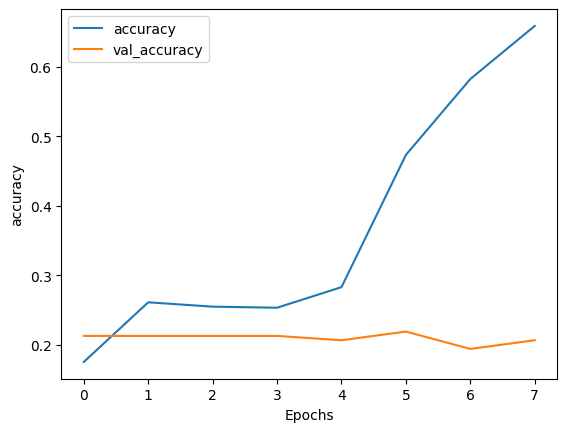

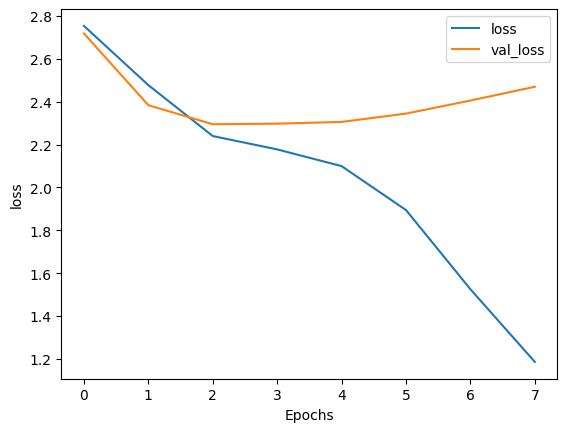

In [ ]:
graph_plots(history, "accuracy")
graph_plots(history, "loss")

Indeed,one hot encoding is better.

### Improving the accuracy methods:

- Bbidirectional LSTM
- experiment with pre-trained embeddings like GloVe or Word2Vec for potentially better representations of your text.
- changing the number of units in the LSTM layer, or experiment with stacking multiple LSTM layers (Risk of overfitting and quiet costly)
- Use GRU instead of LSTM or add conv1D before LSTM
- Adjust dropout rates
- Use L1/L2 reg
- Optimizers: SGD or RMSprop
- Adjust Batchsize or Lr
- Transformer????
- Error Analysis

### First : Bidirectional LSTM

In [ ]:
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D


Bidirectional LSTM trains two layers on the input sequence. One LSTM layer on the input sequence and second LSTM layer on the reversed copy of the input sequence provides more context for learning sequences

In [ ]:
#Reserve word_idex
#reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
#def decode_article(text):
# return ' '.join([reverse_word_index.get(i,'?') for i in text])
#print(decode_article(X[0]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=1234)
print(X_train.shape,y_train.shape)

(400, 800) (400, 14)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=1234)

model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     EMBEDDING_DIM))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM( EMBEDDING_DIM, dropout=0.3, recurrent_dropout=0.3)))
model.add(Dense(EMBEDDING_DIM, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(EMBEDDING_DIM, activation='relu'))
model.add(Dropout(0.8))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
epochs = 25 # Number of passes through entire dataset
batch_size = 64 # Number of samples processed before the model is updated

history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2 ,
                    callbacks=[
                        EarlyStopping(monitor='val_loss',
                                      patience=5,
                                      min_delta=1e-8)]) # Train the model



Epoch 1/25
10/10 [==============================] - 94s 9s/step - loss: 2.7656 - accuracy: 0.1328 - val_loss: 2.7410 - val_accuracy: 0.2125
Epoch 2/25
10/10 [==============================] - 93s 9s/step - loss: 2.7072 - accuracy: 0.1625 - val_loss: 2.6618 - val_accuracy: 0.2125
Epoch 3/25
10/10 [==============================] - 92s 9s/step - loss: 2.6630 - accuracy: 0.2094 - val_loss: 2.6620 - val_accuracy: 0.2125
Epoch 4/25
10/10 [==============================] - 93s 9s/step - loss: 2.6482 - accuracy: 0.2266 - val_loss: 2.6621 - val_accuracy: 0.2125
Epoch 5/25
10/10 [==============================] - 95s 10s/step - loss: 2.6409 - accuracy: 0.2328 - val_loss: 2.6621 - val_accuracy: 0.2125
Epoch 6/25
10/10 [==============================] - 94s 9s/step - loss: 2.6324 - accuracy: 0.2422 - val_loss: 2.6621 - val_accuracy: 0.2125
Epoch 7/25
10/10 [==============================] - 92s 9s/step - loss: 2.6227 - accuracy: 0.2516 - val_loss: 2.6621 - val_accuracy: 0.2125


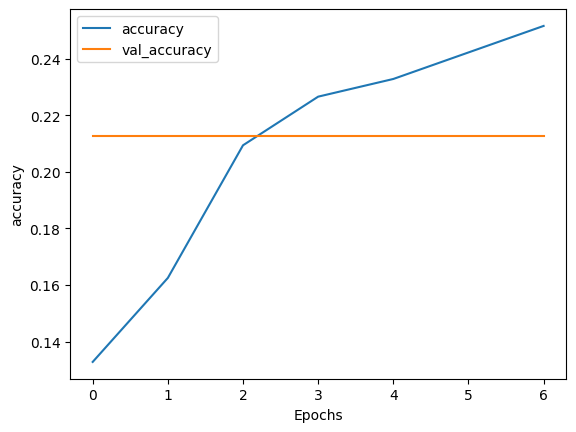

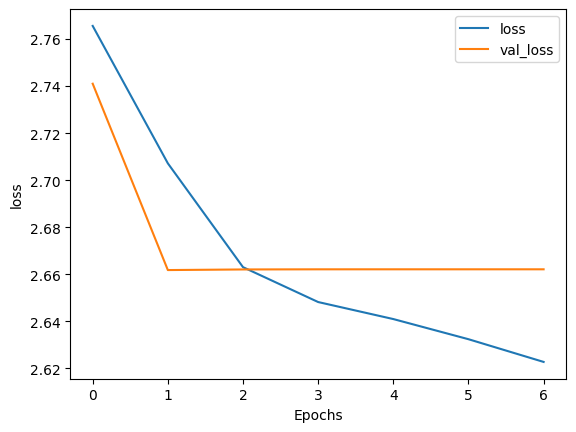

In [ ]:
def graph_plots(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

graph_plots(history, "accuracy")
graph_plots(history, "loss")